# Animating Plots

*Author: Eric Van Clepper*

---

The easiest way I've found to make animations is using matplotlib `FuncAnimation` function. Here's one way to do it!

For more info: check out the [mpl animation documentation](https://matplotlib.org/stable/users/explain/animations/animations.html)

First: import the packages we'll need

In [1]:
# Numpy for better arrays
import numpy as np

# import pyplot for plotting functions
import matplotlib.pyplot as plt

# magic command to make animations show up in notebook
# this does not work in google colab, but if you are in a Jupyter notebook
# uncomment the next line to have animations show up in interactive mode
# %matplotlib notebook

# import FuncAnimation to animate
from matplotlib.animation import FuncAnimation

## Animating a Line

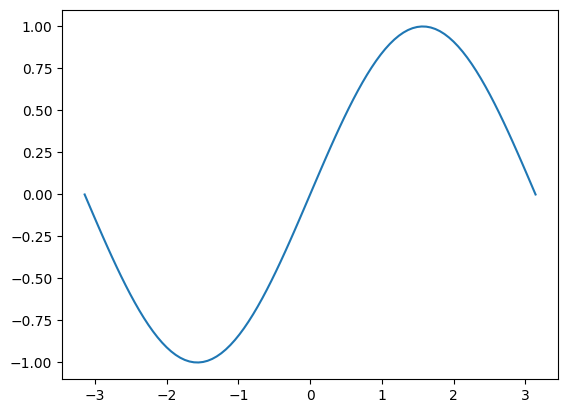

In [2]:
# X and Y data
X = np.linspace(-np.pi,np.pi,100)
Y = np.sin(X)
# plot the t=0 data
fig,ax = plt.subplots()
line, = ax.plot(X,Y)
plt.show()

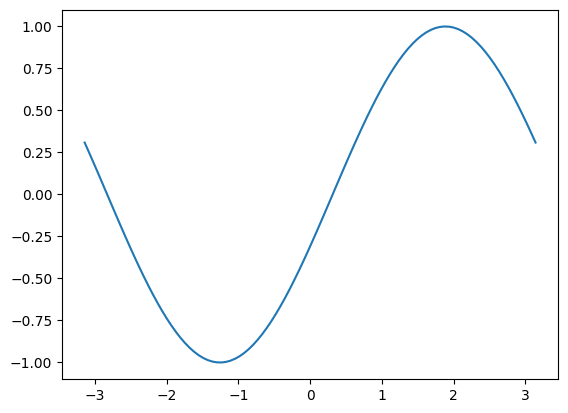

In [3]:
fig,ax = plt.subplots()
line, = ax.plot(X,Y)

# for the animation we want to move the line by 1/20 of a wavelength each frame
# define a function that changes the line from above by a set amount
def animate(i):
  yi = np.sin(X + i * 2*np.pi/20)
  line.set_ydata(yi)
  return line,

ani = FuncAnimation(
    fig,           # the figure we are animating
    animate,       # the function for how to animate
    frames = 20,   # the number of frames of the animation
                   # (this could also be an array of frame values)
    blit=True,     # this helps speed up the animation, make sure the function
                   # returns anything we want to animate!
)

# the animation won't show up here in the colab notebook, so let's save it to a gif
# click on the folder icon on the left to see the animation that's been saved!
ani.save('line_animation.gif')
plt.show()

## Animating scatter plot

In [4]:
# generate some fake data
# here, have 100 points, each with 20 different values
X = np.zeros((20,100))
Y = np.zeros((20,100))

# random spread of data about a line
rng = np.random.default_rng()
X[0] = np.linspace(0,1,100) + 0.1*rng.uniform(-1,1,100)
Y[0] = 2*X[0] + 0.2*rng.uniform(-1,1,100)

# move the points around each timestep
for i in range(1,20):
  X[i] = X[i-1] + 0.05*rng.uniform(-1,1,100)
  Y[i] = 2*X[i] + 0.2*rng.uniform(-1,1,100) + 0.1*np.sin(X[i]*2*np.pi)


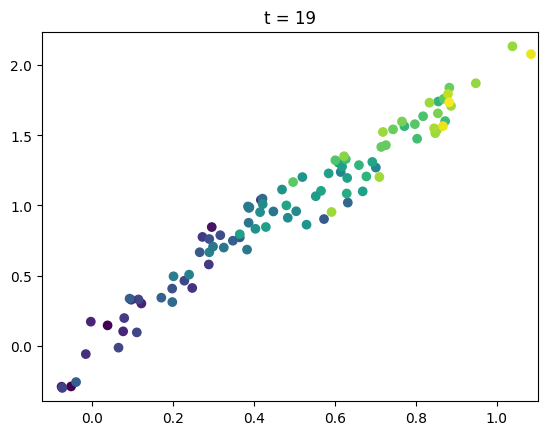

In [6]:
# now we animate the data!

# create the figure and axis
fig,ax = plt.subplots()

# we can also animate the title
title = ax.set_title('t = 0')

# create a scatter plot at time 0, set the color to the original X position
sc = ax.scatter(X[0],Y[0],c=X[0])

# define our function to change the plot
def animate(i):
  # this is just a little restructuring of the data we have to do so that it is
  # in the format that matplotlib expects for the scatter data
  offsets = np.stack((X[i],Y[i])).T
  sc.set_offsets(offsets)     # Note, for a line it was set_ydata, here it is set_offsets
  title.set_text(f't = {i}')  # everything has its own set_ function, check out the mpl documentation
  # make sure we return everything that we change!
  return sc,title,

# blit=True means the animation will only redraw things that change, so it's required
# to return anything and everything that changes each frame in the animate() functions
ani = FuncAnimation(
    fig, animate, frames = 20, blit=True
)

ani.save('scatter_animation.gif')
plt.show()

